## Econ 212 Class noteboook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # HP filter and OLS regression
import datetime
import subprocess
from datetime import datetime as dt
import matplotlib.dates as mdates
import importlib
from pandas_datareader.fred import FredReader


In [2]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 2.5

In [3]:
import data_load_212
# importlib.reload(data_load_212)

Save Figures and Path

In [4]:
# Variables to control saving and path
save_fig = True  # Change this to False if you don't want to save
save_path = '/Users/awellman/Documents/SIEPR/GitHub/macrodata-wellman/Econ212/Figures'  # Change this to your desired path

Function to take best linear fit, decadal average growth

In [5]:
def reg_fit(Y,X, verbose=False):
    X = sm.add_constant(X)
    model=sm.OLS(Y,X)
    results = model.fit()
    if verbose:
        print(results.summary())
    return results.predict(), results.params

def decadal_average_growth(ser, dec=False):
    if dec:
        # Actual decadal growh
        t=ser.loc['1950-03-31':'1959-12-31']
        nq=t.index.size
        print('Average for 1950s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1960-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1960s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1979-12-31']
        nq=t.index.size
        print('Average for 1970s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1980-03-31':'1989-12-31']
        nq=t.index.size
        print('Average for 1980s :', round(np.log(t[-1]/t[0])/(nq/4),4))  

        t=ser.loc['1990-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1990s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2009-12-31']
        nq=t.index.size
        print('Average for 2000s :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2010-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2010s :', round(np.log(t[-1]/t[0])/(nq/4),4))
    else:
        # 20-year growth
        t=ser.loc['1950-03-31':'1969-12-31']
        nq=t.index.size
        print('Average for 1950/60 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['1970-03-31':'1999-12-31']
        nq=t.index.size
        print('Average for 1970/80 :', round(np.log(t[-1]/t[0])/(nq/4),4))

        t=ser.loc['2000-03-31':'2019-12-31']
        nq=t.index.size
        print('Average for 2000/10 :', round(np.log(t[-1]/t[0])/(nq/4),4))


# Quarterly data

Load data, can use either `same_def` or `own_def` for own deflator

In [6]:
series = data_load_212.get_fred_data('Q','own_def')

In [7]:
# stateu = data_load_212.get_state_u_data('Q')

#### Sample selection

In [8]:
capital=FredReader('RKNANPUSA666NRUG', start='1947').read()

In [9]:
series = series.loc['1954-12-31':dt.now().strftime('%Y-%m-%d')]
series.tail()

,yn,cn,gn,nxn,impn,expn,y,c,g,i,...,invest,govexpen,solow,thours,employment,employmentm25,mrwage,capitalu,hpworker,gdpcapita
date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,26408.405,17917.039,4572.408,-877.204,3891.004,3013.800,21989.981,15171.391,3714.800,4058.491,...,4796.162,9175.833,1.016796,259928.0,71.403386,79.991288,363.0,79.939933,33.900000,65799.0
2023-03-31,26813.601,18269.569,4643.890,-825.687,3890.491,3064.804,22112.329,15312.850,3758.768,3963.689,...,4725.828,9326.383,1.016796,259928.0,71.786497,80.499783,363.0,79.564867,33.933333,66096.0
2023-06-30,27063.012,18419.007,4669.808,-806.093,3767.851,2961.759,22225.350,15343.553,3789.786,4014.121,...,4780.290,9422.404,1.016796,259928.0,71.962109,80.718519,365.0,79.413500,33.800000,66357.0
2023-09-30,27610.128,18679.496,4794.830,-779.231,3809.982,3030.751,22490.692,15461.382,3843.355,4111.053,...,4915.033,10007.677,1.016796,259928.0,72.019121,80.842944,366.0,79.491867,33.800000,67050.0
2023-12-31,27938.831,18888.088,4856.757,-781.059,3835.099,3054.040,22672.859,15569.845,3874.385,4132.083,...,4975.045,9674.975,1.016796,259928.0,71.978457,80.647361,371.0,78.626967,33.733333,67494.0


In [10]:
NQ=series.index.size # Number of quarters in data
series['t']=np.arange(0,NQ) # time
# series['solow'] = series['solow'].pct_change()

In [11]:
# Drop the last entry from the DataFrame
series = series.drop(series.tail(1).index)  # This removes the last row

In [12]:
series

,yn,cn,gn,nxn,impn,expn,y,c,g,i,...,govexpen,solow,thours,employment,employmentm25,mrwage,capitalu,hpworker,gdpcapita,t
date,,,,,,,,,,,,,,,,,,,,,
1954-12-31,399.734,245.093,91.356,1.145,15.460,16.605,2936.852,1761.703,1049.200,295.882,...,NaN,0.667260,110356.50,NaN,NaN,NaN,NaN,NaN,17960.0,0
1955-03-31,413.073,251.398,91.869,1.104,16.169,17.273,3020.746,1801.231,1049.830,325.442,...,NaN,0.672531,111238.00,NaN,NaN,NaN,NaN,NaN,18396.0,1
1955-06-30,421.532,256.466,92.533,-0.155,17.097,16.942,3069.910,1835.737,1039.546,345.235,...,NaN,0.671574,111837.75,NaN,NaN,NaN,NaN,NaN,18621.0,2
1955-09-30,430.221,260.651,94.099,0.724,17.421,18.145,3111.379,1858.411,1046.213,350.533,...,NaN,0.670617,112437.50,NaN,NaN,NaN,NaN,NaN,18787.0,3
1955-12-31,437.092,264.639,93.331,0.240,18.109,18.349,3130.068,1881.748,1025.470,358.661,...,NaN,0.669661,113037.25,NaN,NaN,NaN,NaN,NaN,18808.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,25994.639,17684.189,4477.855,-892.026,3976.524,3084.498,21851.134,15127.399,3666.982,4024.750,...,8894.032,1.016796,259928.00,71.400668,80.115599,362.0,80.760167,34.000000,65469.0,271
2022-12-31,26408.405,17917.039,4572.408,-877.204,3891.004,3013.800,21989.981,15171.391,3714.800,4058.491,...,9175.833,1.016796,259928.00,71.403386,79.991288,363.0,79.939933,33.900000,65799.0,272
2023-03-31,26813.601,18269.569,4643.890,-825.687,3890.491,3064.804,22112.329,15312.850,3758.768,3963.689,...,9326.383,1.016796,259928.00,71.786497,80.499783,363.0,79.564867,33.933333,66096.0,273


## Lecture 1

## GDP per Person vs a linear trend 

In [13]:
series['ypop'] = series['y'] / series['pop']
series['ypoplogfit'], regparams=reg_fit(np.log(series['ypop']), series['t'], verbose=False)
series['ylogfit'], regparams=reg_fit(np.log(series['y']), series['t'], verbose=False)

/var/folders/cj/jxhf4_2j2cd0fqn86jgn30k80000gs/T/ipykernel_81116/4246408836.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
/var/folders/cj/jxhf4_2j2cd0fqn86jgn30k80000gs/T/ipykernel_81116/4246408836.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (series['ypoplogfit']-np.log(series['ypop'][0])).plot(label='linear trend')


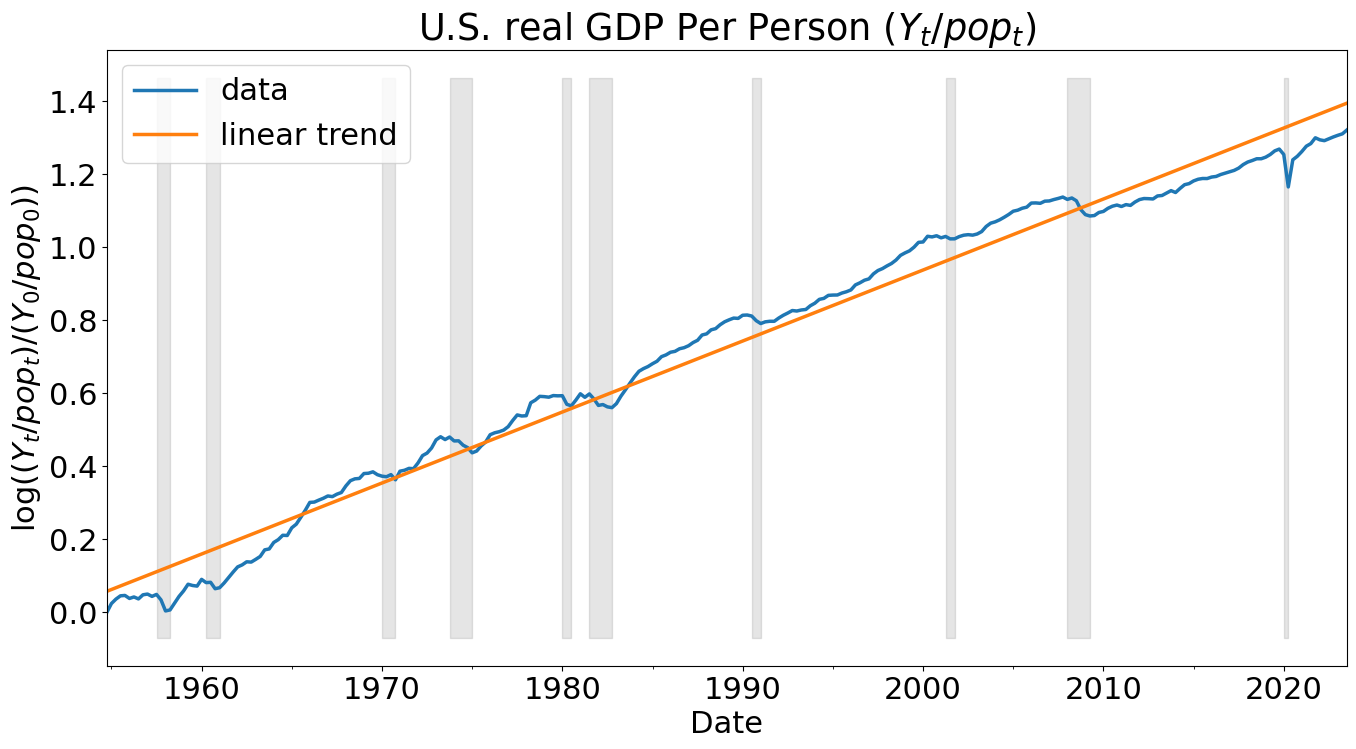

In [14]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(series['ypoplogfit']-np.log(series['ypop'][0])).plot(label='linear trend')
yl, yh = plt.ylim()
plt.legend()
plt.xlabel('Date')
plt.ylabel(r'$\log((Y_t/pop_t)/(Y_0/pop_0))$')
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('U.S. real GDP Per Person ($Y_t/pop_t$)')

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_gdplinear.pdf', transparent=True)

plt.show()
    

## Taking Out the Trend: The HP Filter

In [15]:
#cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),100000000000)
#lambdahp=100000000000
lambdahp=1600
cycle_y, trend_y=sm.tsa.filters.hpfilter(np.log(series['y']),lambdahp)
cycle_ypop, trend_ypop=sm.tsa.filters.hpfilter(np.log(series['ypop']),lambdahp)
#trend_bk.plot()

/var/folders/cj/jxhf4_2j2cd0fqn86jgn30k80000gs/T/ipykernel_81116/2228144274.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
/var/folders/cj/jxhf4_2j2cd0fqn86jgn30k80000gs/T/ipykernel_81116/2228144274.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (trend_ypop-np.log(series['ypop'][0])).plot(label=r'hp trend ($\lambda=1600$)')


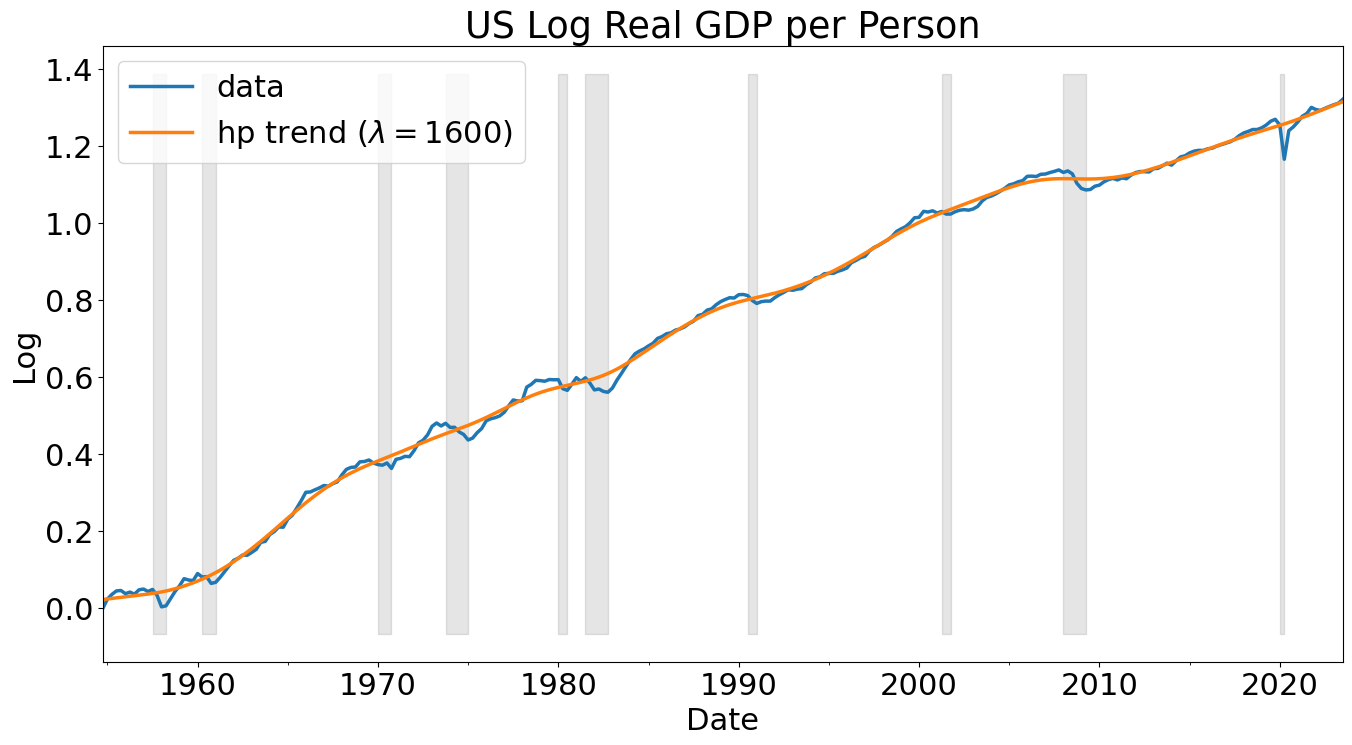

In [16]:
(np.log(series['ypop'])-np.log(series['ypop'][0])).plot(label='data')
(trend_ypop-np.log(series['ypop'][0])).plot(label=r'hp trend ($\lambda=1600$)')
yl, yh = plt.ylim()
plt.ylabel('Log')
plt.xlabel('Date')
plt.legend()
# Draw shaded for recession
plt.fill_between(series.index, yl, yh, where=series['USREC'].values, color='k', alpha=0.1)
plt.title('US Log Real GDP per Person')

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_gdpHPtrend.pdf', transparent=True)

## US output: detrending matters, Business cycles more severe & persistent... 

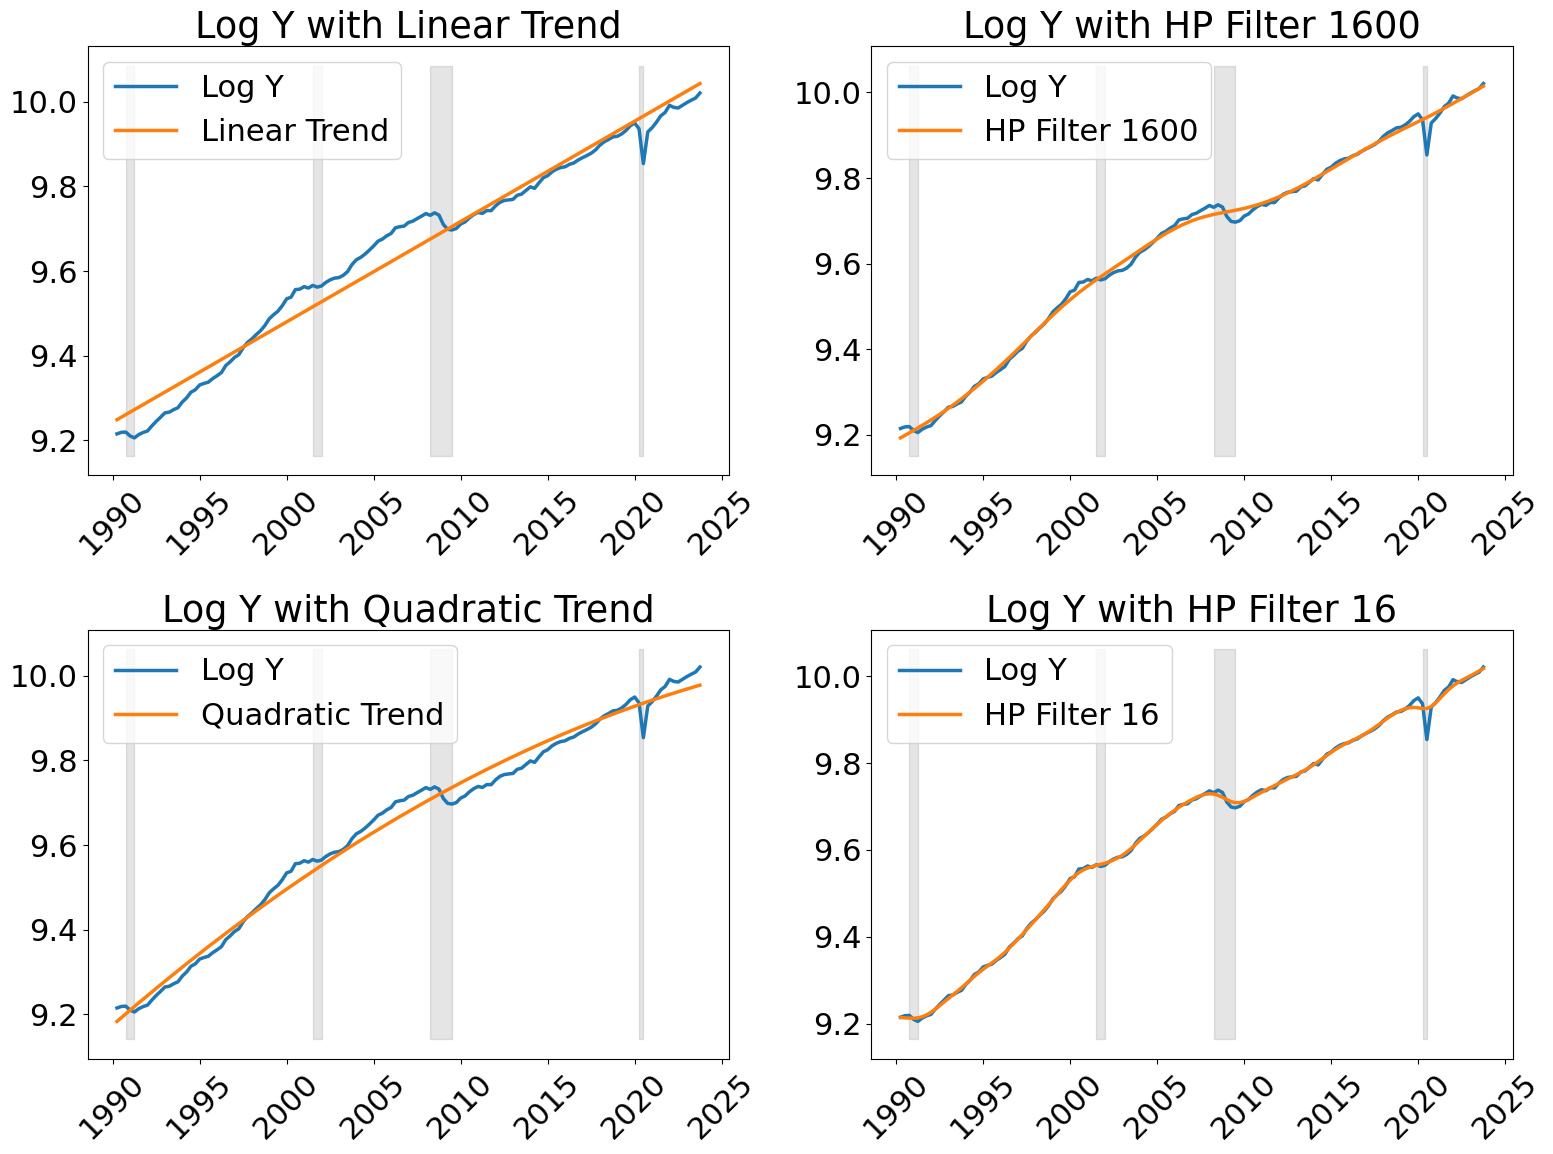

In [17]:
# Filter the DataFrame to start from 1990 and make a copy to avoid SettingWithCopyWarning
series2 = series[series.index >= '1990-01-01'].copy()

# Recalculate 't' since we are starting from 1990 now
series2['t'] = np.arange(len(series2)) # Time index

# Log of GDP
series2['ylog'] = np.log(series2['y'])

# Linear Trend
series2['ypoplogfit'], regparams = reg_fit(series2['ylog'], series2['t'], verbose=False)

# HP Filters
lambdahp_1600 = 1600
lambdahp_16 = 16
cycle_y_1600, trend_y_1600 = sm.tsa.filters.hpfilter(series2['ylog'], lambdahp_1600)
cycle_y_16, trend_y_16 = sm.tsa.filters.hpfilter(series2['ylog'], lambdahp_16)

# Quadratic Trend
series2['t_sq'] = series2['t'] ** 2
X_quad = sm.add_constant(series2[['t', 't_sq']])
model_quad = sm.OLS(series2['ylog'], X_quad)
results_quad = model_quad.fit()
quad_fit = results_quad.predict(X_quad)

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12)) # 2x2 subplots

# Top-Left: Linear Trend
axs[0, 0].plot(series2.index, series2['ylog'], label='Log Y')
axs[0, 0].plot(series2.index, series2['ypoplogfit'], label='Linear Trend')
axs[0, 0].set_title('Log Y with Linear Trend')
axs[0, 0].legend()

# Top-Right: HP Filter 1600
axs[0, 1].plot(series2.index, series2['ylog'], label='Log Y')
axs[0, 1].plot(series2.index, trend_y_1600, label='HP Filter 1600')
axs[0, 1].set_title('Log Y with HP Filter 1600')
axs[0, 1].legend()

# Bottom-Left: Quadratic Trend
axs[1, 0].plot(series2.index, series2['ylog'], label='Log Y')
axs[1, 0].plot(series2.index, quad_fit, label='Quadratic Trend')
axs[1, 0].set_title('Log Y with Quadratic Trend')
axs[1, 0].legend()

# Bottom-Right: HP Filter 16
axs[1, 1].plot(series2.index, series2['ylog'], label='Log Y')
axs[1, 1].plot(series2.index, trend_y_16, label='HP Filter 16')
axs[1, 1].set_title('Log Y with HP Filter 16')
axs[1, 1].legend()

# Adding recession shades to all subplots
for ax in axs.flat:
    ax.fill_between(series2.index, *ax.get_ylim(), where=series2['USREC'].values, color='k', alpha=0.1)

for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Show year label every 5 years
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to display only the year
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)  # Rotate labels to avoid overlap


plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_gdp4.pdf', transparent=True)

plt.show()

## US output: detrending matters 

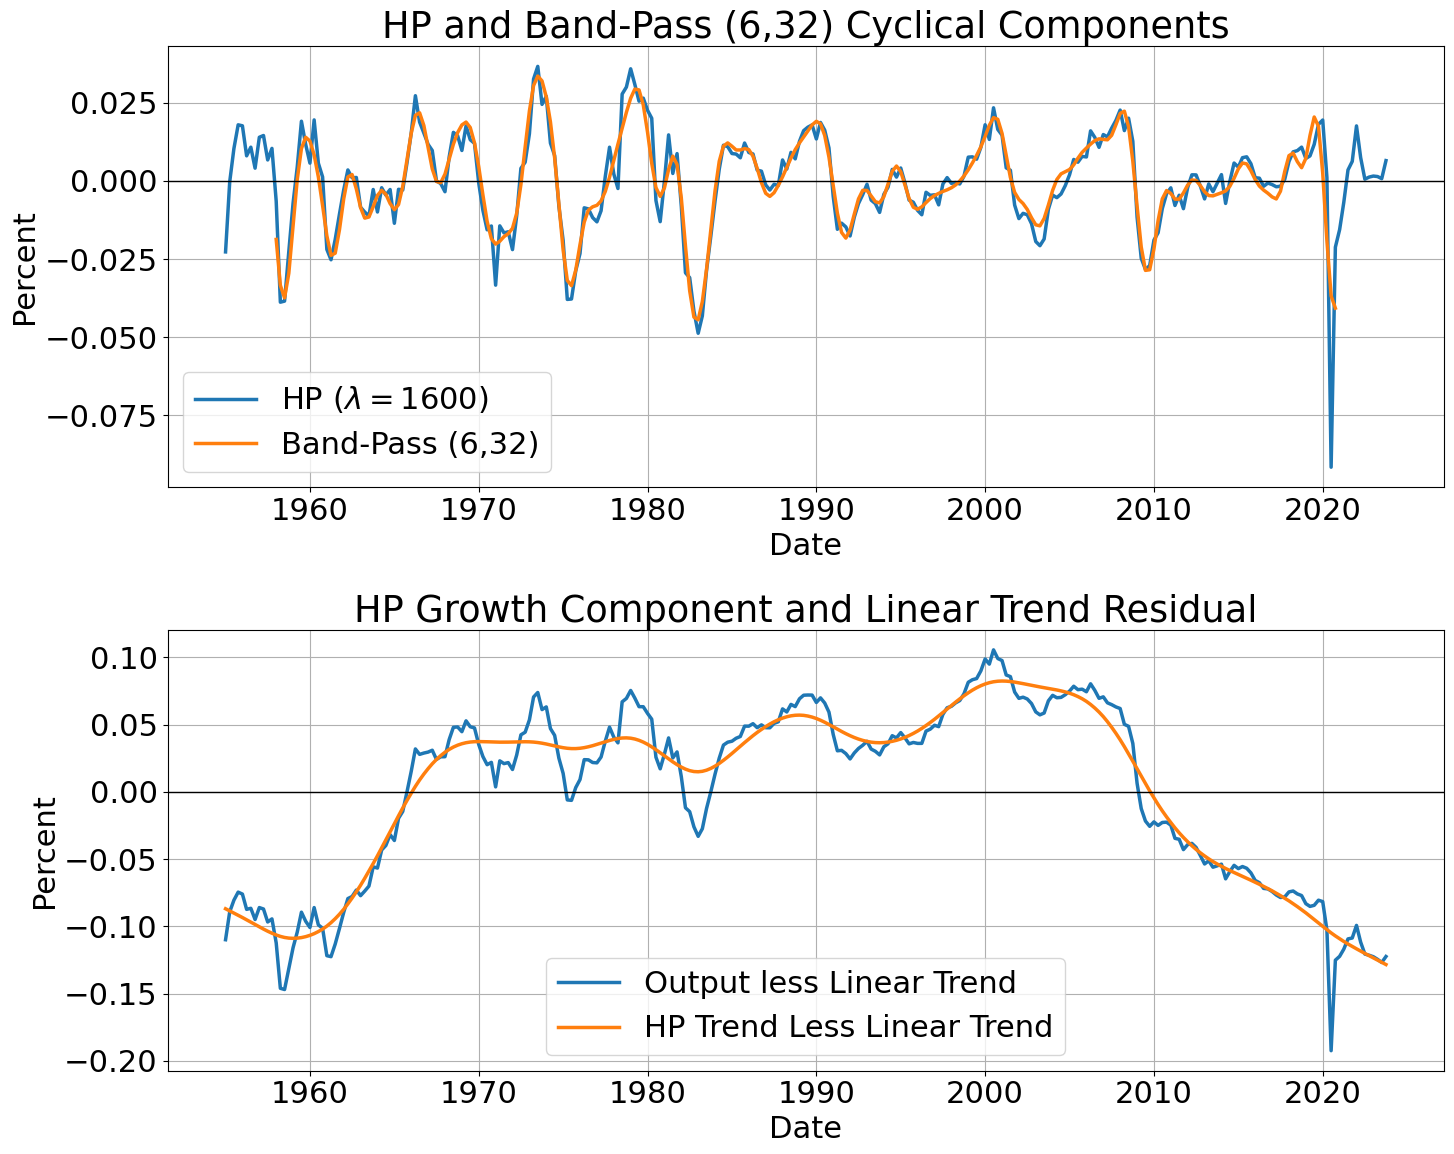

In [18]:
# First graph data preparation
cycle_ypop, trend_ypop = sm.tsa.filters.hpfilter(np.log(series['ypop']), lambdahp)
cycle_ypop_bp = sm.tsa.filters.bkfilter(np.log(series['ypop']), low=6, high=32, K=12)

# Second graph data preparation
output_less_linear_trend = (np.log(series['y']) - series['ylogfit'])
cycle_y_1600, trend_y_1600 = sm.tsa.filters.hpfilter(np.log(series['y']), lambdahp)
hp_trend_less_linear_trend = (trend_y_1600 - series['ylogfit'])

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Plotting the first graph
axs[0].plot(cycle_ypop, label=r'HP ($\lambda=1600$)')
axs[0].plot(cycle_ypop_bp, label='Band-Pass (6,32)')
yl, yh = axs[0].set_ylim()
axs[0].set_ylabel('Percent')
axs[0].set_xlabel('Date')
axs[0].legend()
axs[0].set_title('HP and Band-Pass (6,32) Cyclical Components')
axs[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axs[0].grid(True)

# Plotting the second graph
axs[1].plot(series.index, output_less_linear_trend, label="Output less Linear Trend")
axs[1].plot(series.index, hp_trend_less_linear_trend, label="HP Trend Less Linear Trend")
axs[1].set_ylabel('Percent')
axs[1].set_xlabel('Date')
axs[1].set_title('HP Growth Component and Linear Trend Residual')
axs[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axs[1].legend()
axs[1].grid(True)



plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_HPBP.pdf', transparent=True)

plt.show()

## (1) ND consumption less volatile, D consumption more volatile, highly correlated 

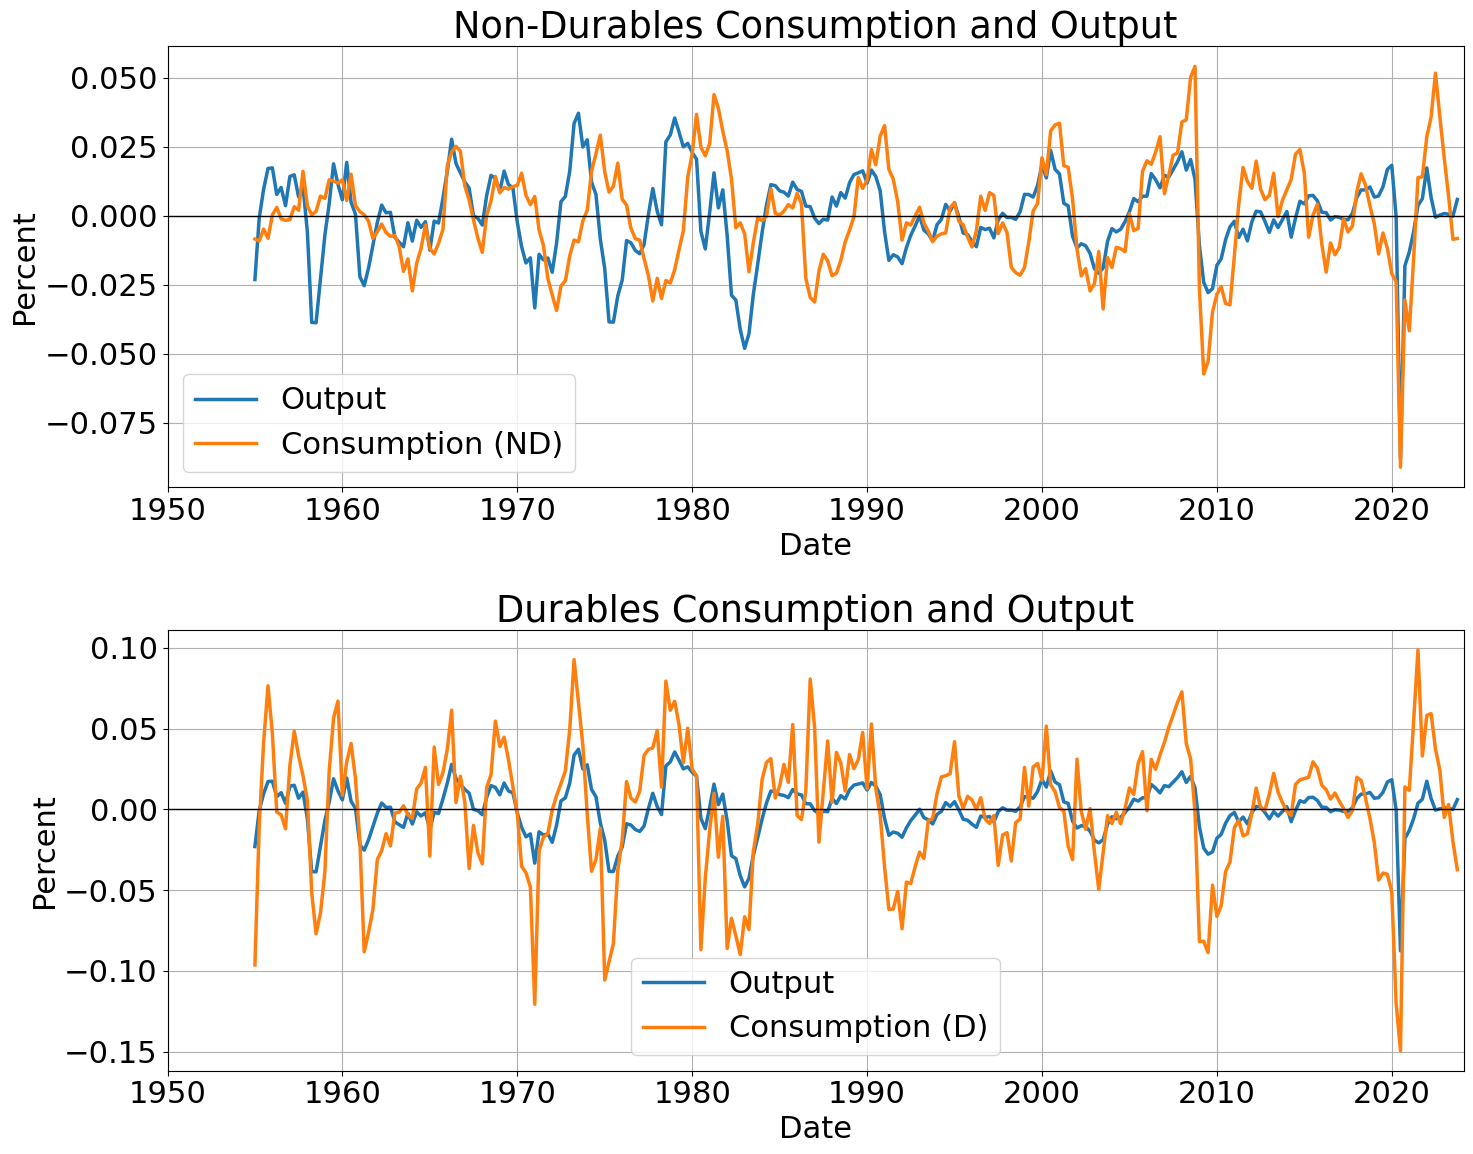

In [19]:
# Step 1: Prepare the Data
# Drop all NaN values from 'nondur' and 'dur'
cleaned_nondur = series['nondur'].dropna()
cleaned_dur = series['dur'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_nondur, trend_nondur = sm.tsa.filters.hpfilter(np.log(cleaned_nondur), lambdahp_1600)
cycle_dur, trend_dur = sm.tsa.filters.hpfilter(np.log(cleaned_dur), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_nondur, trend_y_nondur = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_nondur.index)), lambdahp_1600)
cycle_y_dur, trend_y_dur = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_dur.index)), lambdahp_1600)

# Define the x-axis range 
x_range = [pd.to_datetime('1950-01-01'), pd.to_datetime('now')]
start_year = 1950
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Non-Durables on the first subplot
axes[0].plot(cleaned_nondur.index, cycle_y_nondur, label='Output')
axes[0].plot(cleaned_nondur.index, cycle_nondur, label='Consumption (ND)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_xlabel('Date')
axes[0].set_title('Non-Durables Consumption and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0


# Plotting Durables on the second subplot
axes[1].plot(cleaned_dur.index, cycle_y_dur, label='Output')
axes[1].plot(cleaned_dur.index, cycle_dur, label='Consumption (D)')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_xlabel('Date')
axes[1].set_title('Durables Consumption and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_durable.pdf', transparent=True)

# Show the plot
plt.show()

## (2) Investment highly procyclical and Government Spending countercyclical 

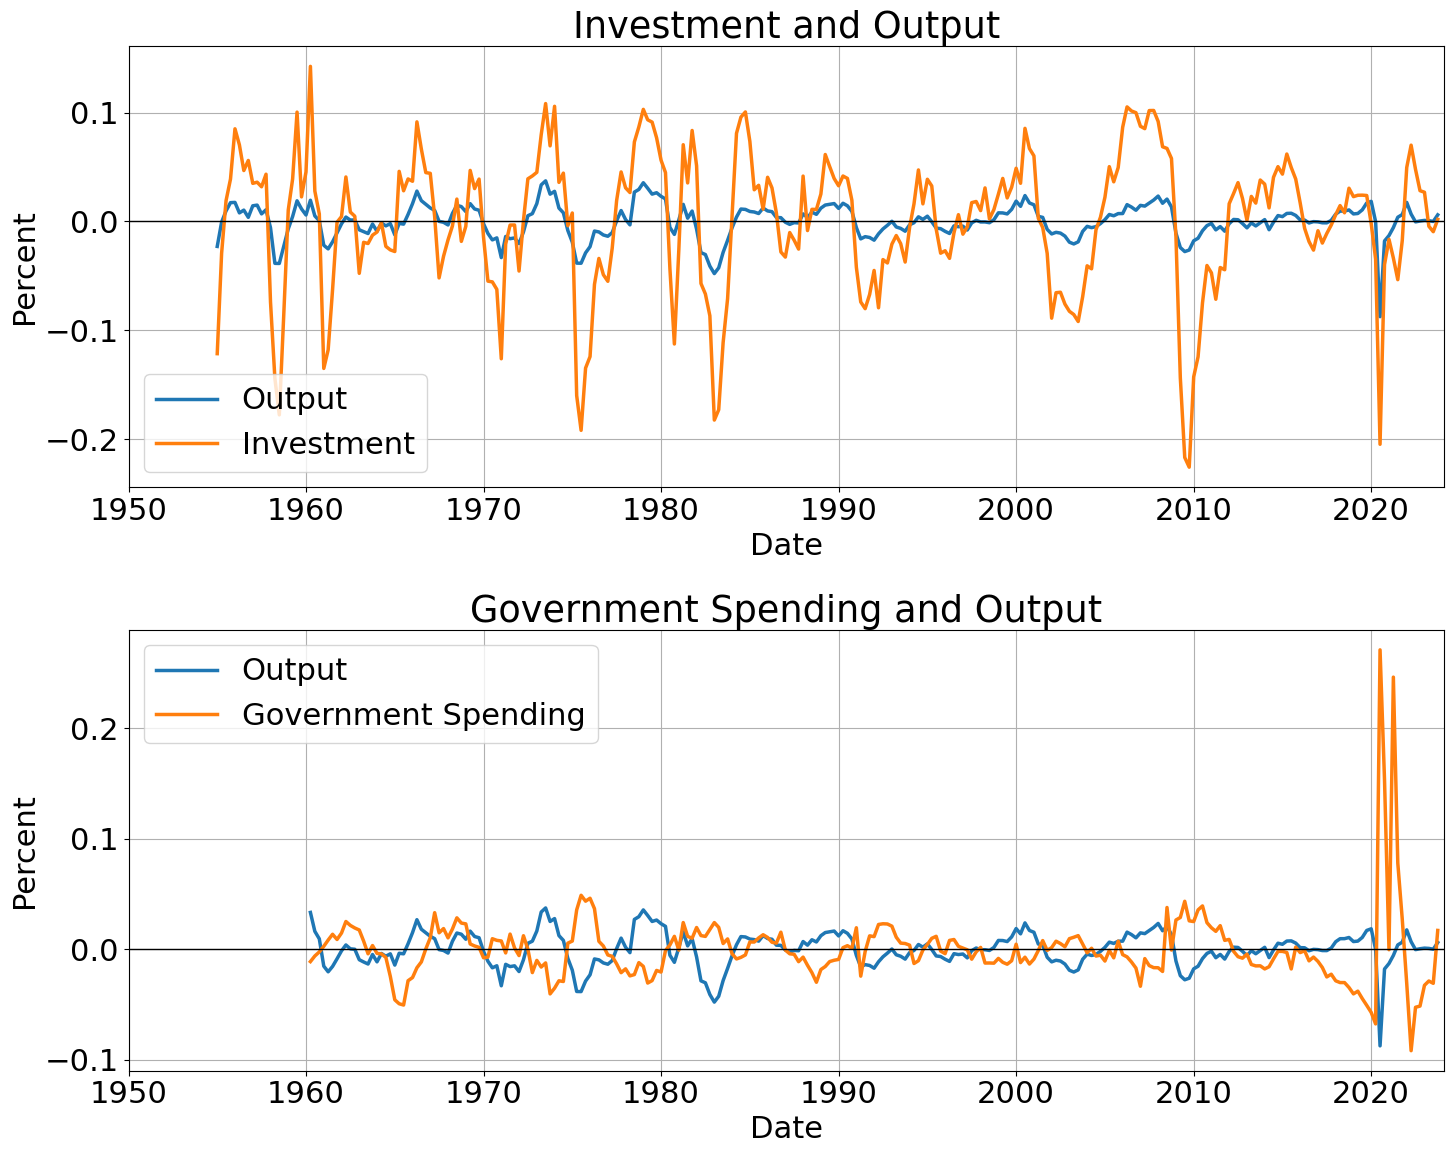

In [20]:
# Drop all NaN values from 'invest' and 'govexpen'
cleaned_invest = series['invest'].dropna()
cleaned_govexpen = series['govexpen'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_invest, trend_invest = sm.tsa.filters.hpfilter(np.log(cleaned_invest), lambdahp_1600)
cycle_govexpen, trend_govexpen = sm.tsa.filters.hpfilter(np.log(cleaned_govexpen), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_invest, trend_y_invest = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_invest.index)), lambdahp_1600)
cycle_y_govexpen, trend_y_govexpen = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_govexpen.index)), lambdahp_1600)

# Define the x-axis range 
x_range = [pd.to_datetime('1950-01-01'), pd.to_datetime('now')]
start_year = 1950
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Investment on the first subplot
axes[0].plot(cleaned_invest.index, cycle_y_invest, label='Output')
axes[0].plot(cleaned_invest.index, cycle_invest, label='Investment')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Investment and Output')
axes[0].set_xlabel('Date')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0

# Plotting Government Expenditure on the second subplot
axes[1].plot(cleaned_govexpen.index, cycle_y_govexpen, label='Output')
axes[1].plot(cleaned_govexpen.index, cycle_govexpen, label='Government Spending')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_xlabel('Date')
axes[1].set_title('Government Spending and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0


# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_investment.pdf', transparent=True)

# Show the plot
plt.show()

## (3) Hours track output, capital mildly procyclical 

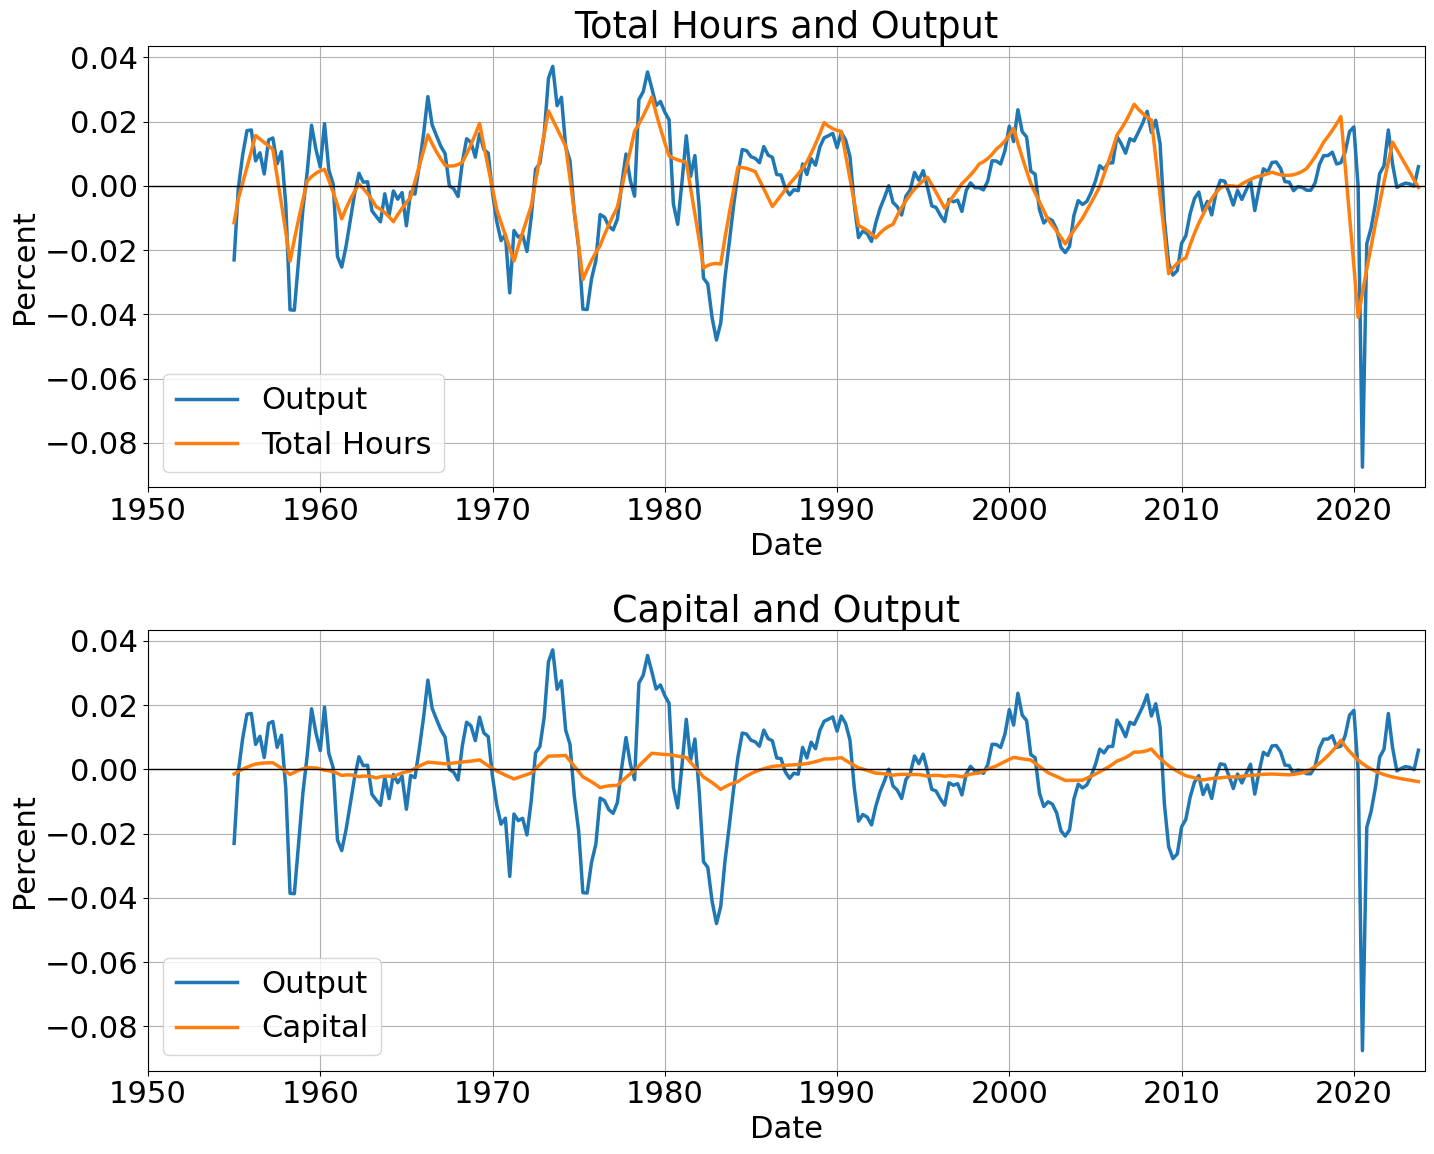

In [21]:
# Drop all NaN values from 'thours' and 'capital'
cleaned_thours = series['thours'].dropna()
cleaned_capital = series['k'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_thours, trend_thours = sm.tsa.filters.hpfilter(np.log(cleaned_thours), lambdahp_1600)
cycle_capital, trend_capital = sm.tsa.filters.hpfilter(np.log(cleaned_capital), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_thours, trend_y_thours = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_thours.index)), lambdahp_1600)
cycle_y_capital, trend_y_capital = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_capital.index)), lambdahp_1600)

# Define the x-axis range 
x_range = [pd.to_datetime('1950-01-01'), pd.to_datetime('now')]
start_year = 1950
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Total Hours on the first subplot
axes[0].plot(cleaned_thours.index, cycle_y_thours, label='Output')
axes[0].plot(cleaned_thours.index, cycle_thours, label='Total Hours')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Total Hours and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xlabel('Date')
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0


# Plotting Capital on the second subplot
axes[1].plot(cleaned_thours.index, cycle_y_thours, label='Output')
axes[1].plot(cleaned_capital.index, cycle_capital, label='Capital')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Capital and Output')
axes[1].set_xlabel('Date')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0


# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_hourscap.pdf', transparent=True)

# Show the plot
plt.show()

## (4) Utilization strongly procyclical, Solow residual procyclical 

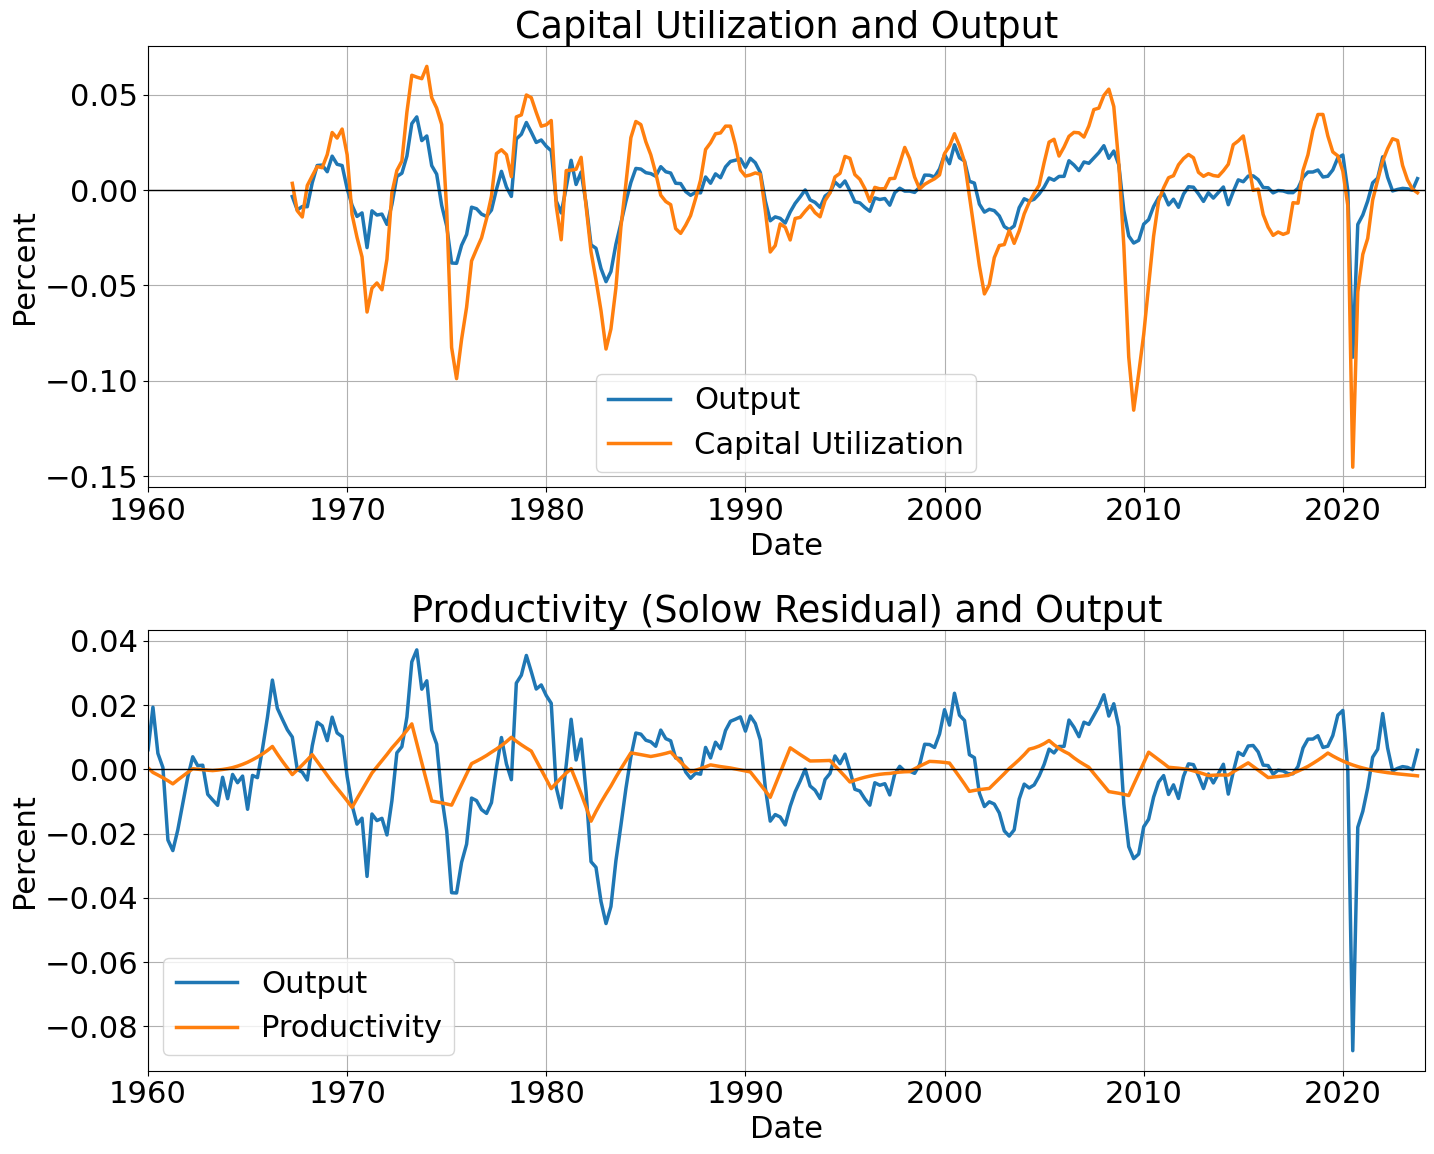

In [22]:
# Drop all NaN values from 'capitalu' and 'solow'
cleaned_capitalu = series['capitalu'].dropna()
cleaned_solow = series['solow'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_capitalu, trend_capitalu = sm.tsa.filters.hpfilter(np.log(cleaned_capitalu), lambdahp_1600)
cycle_solow, trend_solow = sm.tsa.filters.hpfilter(cleaned_solow, lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_capitalu, trend_y_capitalu = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_capitalu.index)), lambdahp_1600)
cycle_y_solow, trend_y_solow = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_solow.index)), lambdahp_1600)

# Step 3: Plot the Data
# Creating 2x1 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Define the x-axis range
x_range = [pd.to_datetime('1960-01-01'), pd.to_datetime('now')]
start_year = 1960
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')


# Define date formatter to only show the year part
year_formatter = mdates.DateFormatter('%Y')

# Plotting Capital Utilization on the first subplot
axes[0].plot(cleaned_capitalu.index, cycle_y_capitalu, label='Output')
axes[0].plot(cleaned_capitalu.index, cycle_capitalu, label='Capital Utilization')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_xlabel('Date')
axes[0].set_title('Capital Utilization and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0


# Plotting Productivity on the second subplot
axes[1].plot(cleaned_solow.index, cycle_y_solow, label='Output')
axes[1].plot(cleaned_solow.index, cycle_solow, label='Productivity')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_xlabel('Date')
axes[1].set_title('Productivity (Solow Residual) and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0


# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_solow.pdf', transparent=True)

# Show the plot
plt.show()
plt.show()

## (5) Employment more procyclical than hours per worker

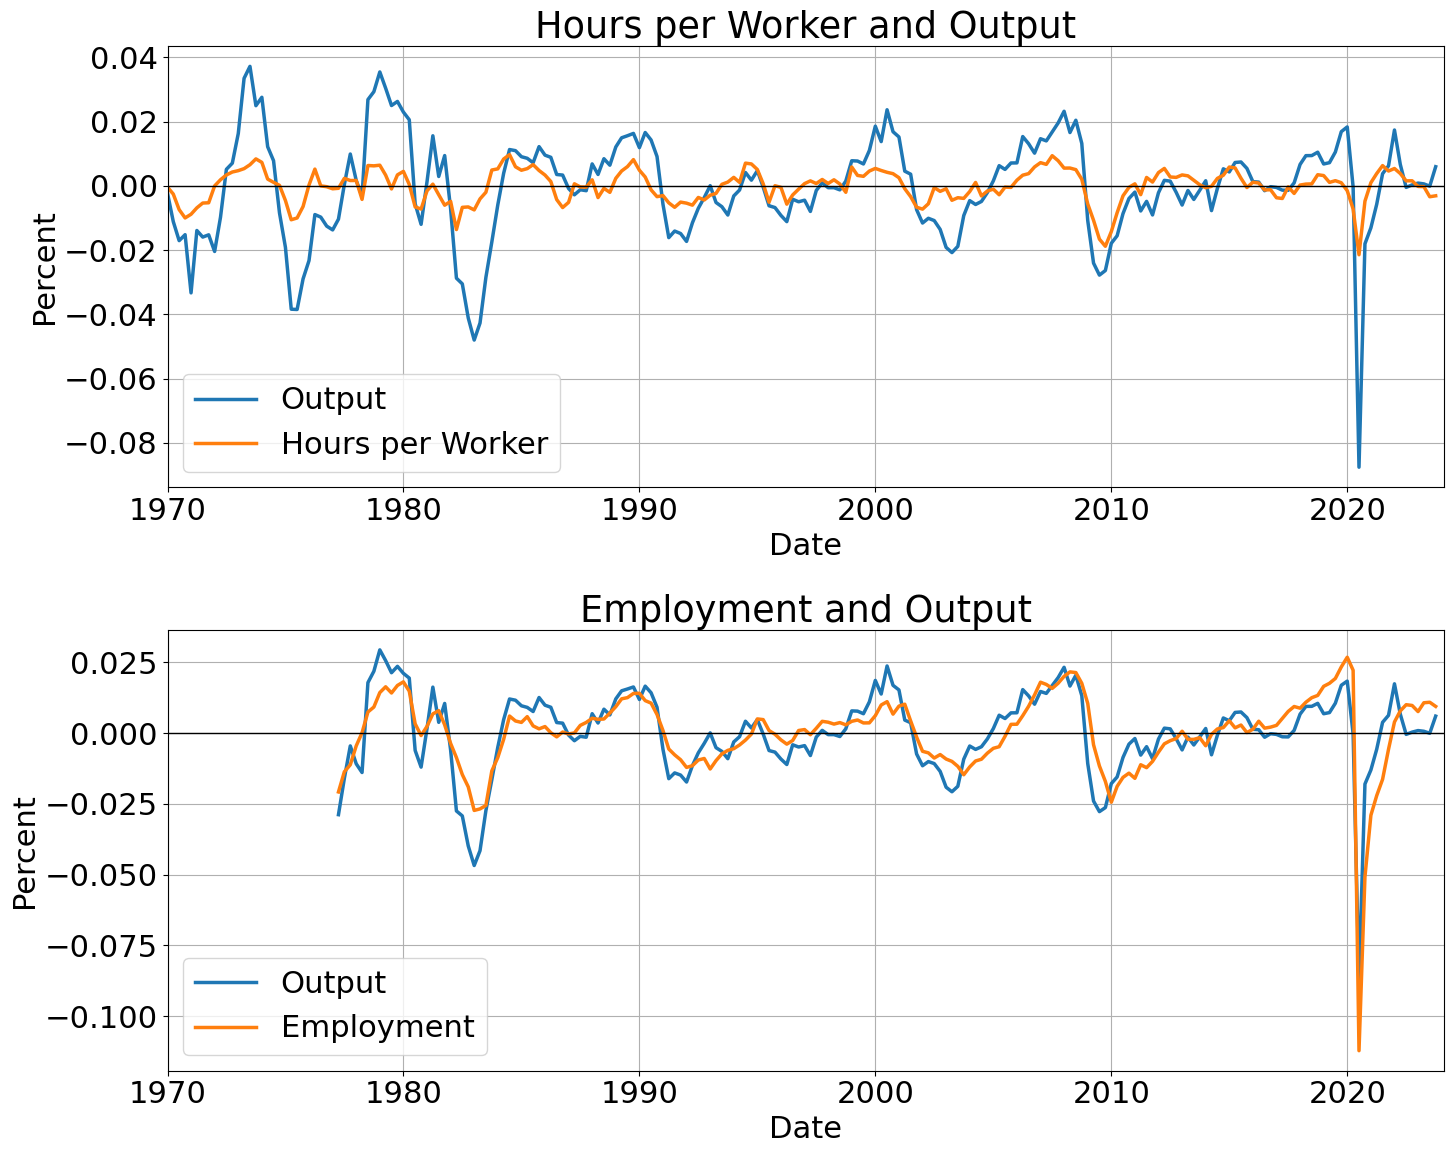

In [23]:
# Drop all NaN values from 'hpworker' and 'employment'
cleaned_hpworker = series['h'].dropna()
cleaned_employment = series['employment'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_hpworker, trend_hpworker = sm.tsa.filters.hpfilter(np.log(cleaned_hpworker), lambdahp_1600)
cycle_employment, trend_employment = sm.tsa.filters.hpfilter(np.log(cleaned_employment), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_hpworker, trend_y_hpworker = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_hpworker.index)), lambdahp_1600)
cycle_y_employment, trend_y_employment = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_employment.index)), lambdahp_1600)

# Define the x-axis range
x_range = [pd.to_datetime('1970-01-01'), pd.to_datetime('now')]
start_year = 1970
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Hours per Worker on the first subplot
axes[0].plot(cleaned_hpworker.index, cycle_y_hpworker, label='Output')
axes[0].plot(cleaned_hpworker.index, cycle_hpworker, label='Hours per Worker')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Hours per Worker and Output')
axes[0].set_xlabel('Date')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0


# Plotting Employment on the second subplot
axes[1].plot(cleaned_employment.index, cycle_y_employment, label='Output')
axes[1].plot(cleaned_employment.index, cycle_employment, label='Employment')
axes[1].legend()
axes[1].grid(True)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Percent')
axes[1].set_title('Employment and Output')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0


# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_houremp.pdf', transparent=True)

# Show the plot
plt.show()


## (6) Average product (Y/N) and real wage not very cyclical

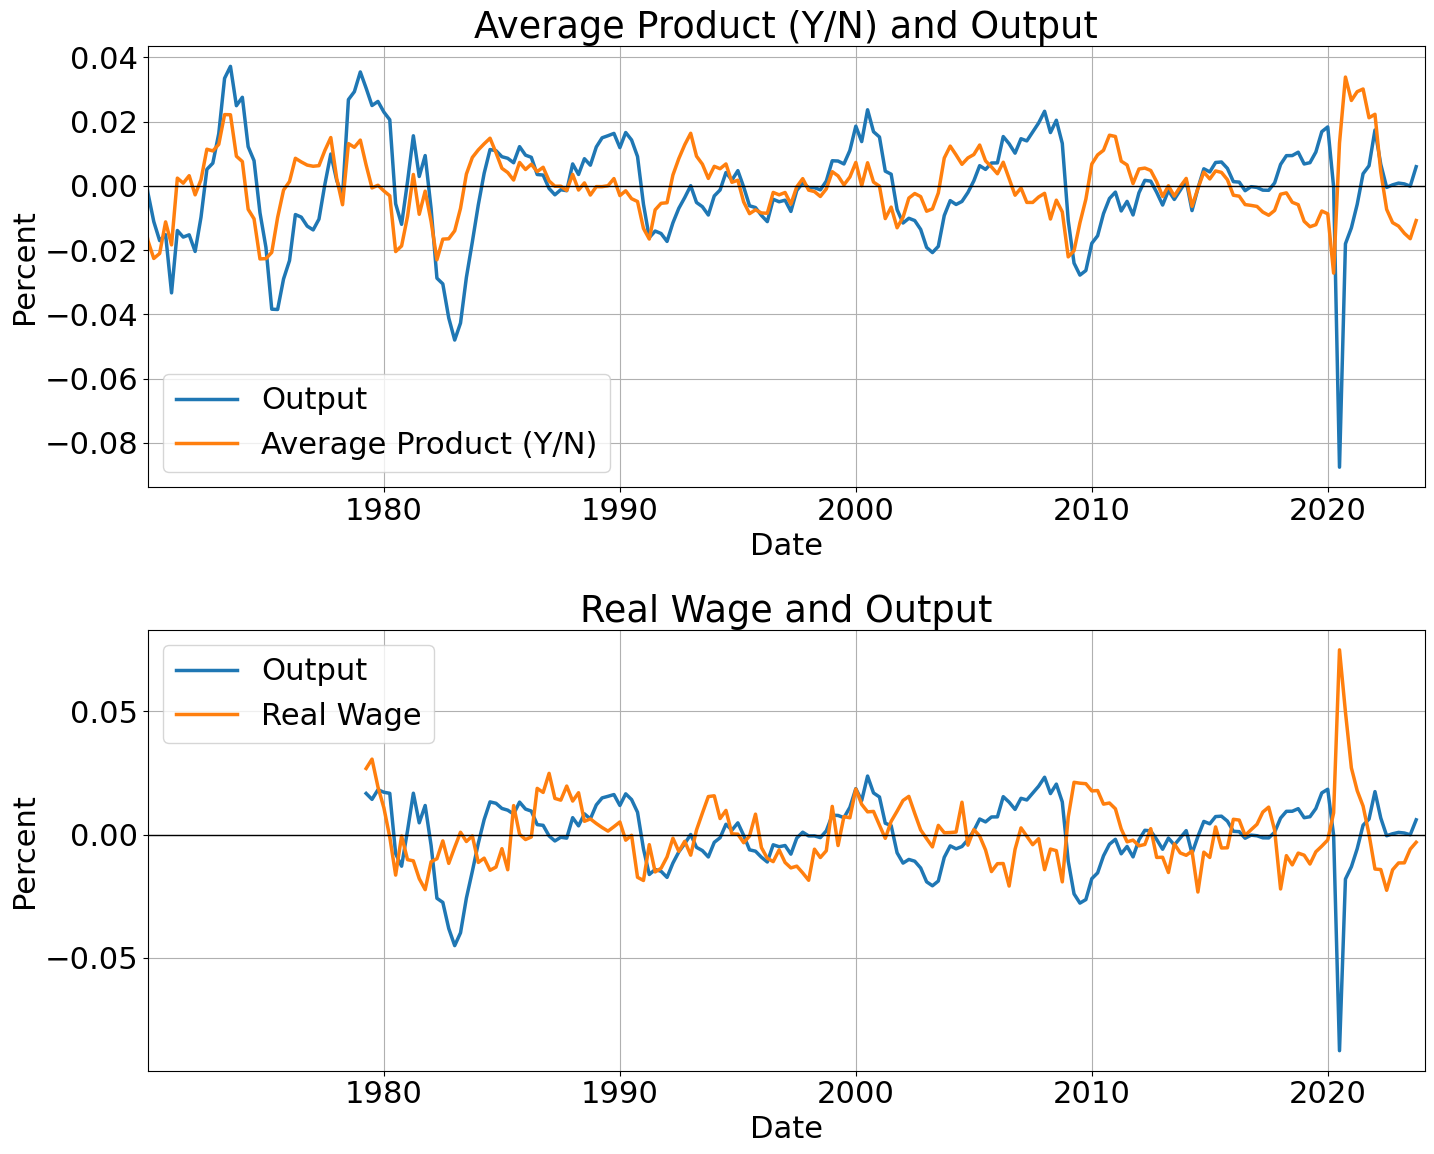

In [24]:
# Drop all NaN values from 'ypop' (Average Product) and 'mrwage' (Real Wage)
series['newgdpcap'] = series['y']/series['emp']
cleaned_ypop = series['newgdpcap'].dropna()
cleaned_mrwage = series['mrwage'].dropna()

# Drop all NaN values from 'y' (GDP) and ensure it has the same indices as the cleaned data
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_ypop, trend_ypop = sm.tsa.filters.hpfilter(np.log(cleaned_ypop), lambdahp_1600)
cycle_mrwage, trend_mrwage = sm.tsa.filters.hpfilter(np.log(cleaned_mrwage), lambdahp_1600)

# Apply the HP filter to 'y' for each corresponding cleaned series and align indices
cycle_y_ypop, trend_y_ypop = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_ypop.index)), lambdahp_1600)
cycle_y_mrwage, trend_y_mrwage = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_mrwage.index)), lambdahp_1600)

# Define the x-axis range
x_range = [pd.to_datetime('1970-01-01'), pd.to_datetime('now')]
start_year = 1980
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Step 3: Plot the Data
# Creating 2x1 subplots with increased width
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plotting Average Product on the first subplot
axes[0].plot(cleaned_ypop.index, cycle_y_ypop, label='Output')
axes[0].plot(cleaned_ypop.index, cycle_ypop, label='Average Product (Y/N)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylabel('Percent')
axes[0].set_title('Average Product (Y/N) and Output')
axes[0].set_xlim(x_range)  # Set the x-axis (time) limits
axes[0].set_xticks(major_ticks)  # Set the major ticks
axes[0].set_xlabel('Date')
axes[0].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0

# Plotting Real Wage on the second subplot
axes[1].plot(cleaned_mrwage.index, cycle_y_mrwage, label='Output')
axes[1].plot(cleaned_mrwage.index, cycle_mrwage, label='Real Wage')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylabel('Percent')
axes[1].set_title('Real Wage and Output')
axes[1].set_xlabel('Date')
axes[1].set_xlim(x_range)  # Set the x-axis (time) limits
axes[1].set_xticks(major_ticks)  # Set the major ticks
axes[1].xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0

# Adjusts the subplots to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_rwage.pdf', transparent=True)

# Show the plot
plt.show()

## (T1-3) Comovements

In [25]:

series['ndive']=  series['pop']/series['emp']

start_date = '1947-01-01'
end_date = '1996-12-31'

# Filter the series DataFrame to include only the desired date range
series2 = series.loc[start_date:end_date]

# List of variable names to be included in the calculations
variable_keys = ['y', 'c', 'nondur', 'dur', 'i', 'exp', 'imp', 'g', 'pop', 'emp', 'ndive', 'solow']

# Convert the specified series to logarithms
log_series = np.log(series2[variable_keys])

# Apply HP filter to detrend the log-transformed series
hp_cycles = {col: sm.tsa.filters.hpfilter(log_series[col], 1600)[0] for col in log_series}

# Calculate the standard deviation of the cyclical components
std_devs = {col: hp_cycles[col].std() for col in hp_cycles}

# Calculate the relative standard deviation using 'y' standard deviation
rel_std_devs = {col: (std_dev / std_devs['y']) for col, std_dev in std_devs.items()}

# Calculate the first-order autocorrelation for the cyclical components
first_order_autocorrs = {col: hp_cycles[col].autocorr(lag=1) for col in hp_cycles}

# Calculate contemporaneous correlation with output ('y') for the cyclical components
cont_corrs_with_y = {col: hp_cycles[col].corr(hp_cycles['y']) for col in hp_cycles if col != 'y'}


# Create a DataFrame to display the results 
results_df = pd.DataFrame({
    'Standard deviation': std_devs,
    'Relative standard deviation': rel_std_devs,
    'First-order autocorrelation': first_order_autocorrs,
    'Contemporaneous correlation with output': cont_corrs_with_y
})

# Rename the DataFrame index to match the LaTeX format
rename_dict = {
    'y': '$Y$',
    'c': '$C$',
    'nondur': '$C^{ND}$',
    'dur': '$C^{D}$',
    'i': '$I$',
    'exp': '$X$',
    'imp': '$M$',
    'g': '$G$',
    'pop': '$N$',
    'emp': '$e$',
    'ndive': '$\\frac{N}{e}$',
    'solow': '$A$'
}
results_df.rename(index=rename_dict, inplace=True)

# Display the results 
results_df

,Standard deviation,Relative standard deviation,First-order autocorrelation,Contemporaneous correlation with output
$Y$,0.016223,1.000000,0.839300,NaN
$C$,0.012942,0.797738,0.854332,0.877170
$C^{ND}$,0.015092,0.930261,0.871612,0.114152
$C^{D}$,0.041790,2.575985,0.712481,0.780726
$I$,0.067887,4.184593,0.788324,0.914465
$X$,0.047899,2.952499,0.667090,0.316989
$M$,0.049307,3.039317,0.734305,0.723501
$G$,0.016125,0.993927,0.793717,0.089619
$N$,0.000731,0.045075,0.906796,-0.154232
$e$,0.013806,0.851029,0.921251,0.800003


In [26]:
# Function to calculate statistics on cyclical components

def calculate_cyclical_statistics(log_series, lambdahp=1600):
    # Dictionary to hold the cyclical components
    cycles = {}
    # Dictionary to hold the standard deviations
    std_devs = {}
    # Dictionary to hold the correlation results
    correlation_results = {}
    
    # Apply HP filter to the log-transformed series to get the cyclical components
    for key in log_series:
        cycle, _ = sm.tsa.filters.hpfilter(log_series[key], lambdahp)
        cycles[key] = cycle
        # Calculate standard deviation of the cycle component
        std_devs[key] = cycle.std() * 100  # to percentage
    
    # Calculate the cross-correlations for the specified lags
    lags = list(range(-3, 4))  # From -3 to +3
    for key in cycles:
        if key != 'y':  # Don't correlate 'Y' with itself
            correlation_results[key] = [cycles['y'].corr(cycles[key].shift(lag)) for lag in lags]
        else:
            correlation_results[key] = [cycles[key].corr(cycles[key].shift(lag)) for lag in lags]
    
    # standard deviations and correlations into a DataFrame
    std_dev_df = pd.DataFrame(std_devs, index=['std dev. %']).T
    correlation_df = pd.DataFrame(correlation_results, index=lags).T
    
    # standard deviations and correlations
    combined_df = pd.concat([std_dev_df, correlation_df], axis=1)
    
    return combined_df

# Specify the series to be included
variable_keys = ['y', 'c', 'nondur', 'dur', 'i', 'exp', 'imp', 'g', 'pop', 'emp', 'ndive', 'solow']

# Filter the series DataFrame to include only the desired date range
start_date = '1947-01-01'
end_date = '1996-12-31'
filtered_series = series.loc[start_date:end_date, variable_keys]

# Log-transform the filtered series
log_filtered_series = np.log(filtered_series)

# Calculate the statistics for the cyclical components
results_df = calculate_cyclical_statistics(log_filtered_series)

# Rename the DataFrame index to match the LaTeX format
rename_dict = {
    'y': '$Y$',
    'c': '$C$',
    'nondur': '$C^{ND}$',
    'dur': '$C^{D}$',
    'i': '$I$',
    'exp': '$X$',
    'imp': '$M$',
    'g': '$G$',
    'pop': '$N$',
    'emp': '$e$',
    'ndive': '$\\frac{N}{e}$',
    'solow': '$A$'
}
results_df.rename(index=rename_dict, inplace=True)

# Print 
results_df


,std dev. %,-3,-2,-1,0,1,2,3
$Y$,1.622308,0.366364,0.616321,0.839300,1.000000,0.839300,0.616321,0.366364
$C$,1.294177,0.235713,0.478153,0.706870,0.877170,0.841618,0.710093,0.539621
$C^{ND}$,1.509170,0.336097,0.296609,0.236373,0.114152,-0.084404,-0.283473,-0.457577
$C^{D}$,4.179042,0.065556,0.324866,0.571077,0.780726,0.719665,0.596889,0.443651
$I$,6.788700,0.240786,0.508070,0.748763,0.914465,0.771774,0.574262,0.364152
$X$,4.789863,0.477702,0.480278,0.444475,0.316989,0.090979,-0.144047,-0.327827
$M$,4.930710,0.229567,0.449186,0.660199,0.723501,0.657988,0.512852,0.380135
$G$,1.612455,0.137999,0.105606,0.090521,0.089619,0.035324,0.011350,-0.029816
$N$,0.073125,-0.213305,-0.199606,-0.181543,-0.154232,-0.101628,-0.035102,0.020545
$e$,1.380632,0.724007,0.848726,0.888796,0.800003,0.556108,0.274168,0.022048


In [27]:

# Split the large DataFrame into three smaller
def split_dataframe(full_df, groups):
    tables = {}
    for group_name, keys in groups.items():
        # Select the rows for the current group and store them in a separate DataFrame
        tables[group_name] = full_df.loc[keys]
    return tables

# Group the variables
groups = {
    'table1': ['$Y$', '$C$', '$C^{ND}$', '$C^{D}$'],
    'table2': ['$Y$', '$I$', '$X$', '$M$', '$G$'],
    'table3': ['$Y$', '$N$', '$e$', '$\\frac{N}{e}$', '$A$']
}

# Split the DataFrame into three tables
table1, table2, table3 = split_dataframe(results_df, groups).values()


In [28]:
table1

,std dev. %,-3,-2,-1,0,1,2,3
$Y$,1.622308,0.366364,0.616321,0.839300,1.000000,0.839300,0.616321,0.366364
$C$,1.294177,0.235713,0.478153,0.706870,0.877170,0.841618,0.710093,0.539621
$C^{ND}$,1.509170,0.336097,0.296609,0.236373,0.114152,-0.084404,-0.283473,-0.457577
$C^{D}$,4.179042,0.065556,0.324866,0.571077,0.780726,0.719665,0.596889,0.443651


In [29]:
table2

,std dev. %,-3,-2,-1,0,1,2,3
$Y$,1.622308,0.366364,0.616321,0.839300,1.000000,0.839300,0.616321,0.366364
$I$,6.788700,0.240786,0.508070,0.748763,0.914465,0.771774,0.574262,0.364152
$X$,4.789863,0.477702,0.480278,0.444475,0.316989,0.090979,-0.144047,-0.327827
$M$,4.930710,0.229567,0.449186,0.660199,0.723501,0.657988,0.512852,0.380135
$G$,1.612455,0.137999,0.105606,0.090521,0.089619,0.035324,0.011350,-0.029816


In [30]:
table3

,std dev. %,-3,-2,-1,0,1,2,3
$Y$,1.622308,0.366364,0.616321,0.839300,1.000000,0.839300,0.616321,0.366364
$N$,0.073125,-0.213305,-0.199606,-0.181543,-0.154232,-0.101628,-0.035102,0.020545
$e$,1.380632,0.724007,0.848726,0.888796,0.800003,0.556108,0.274168,0.022048
$\frac{N}{e}$,1.403058,-0.722768,-0.844795,-0.883586,-0.795254,-0.552543,-0.271647,-0.020635
$A$,0.648268,-0.325351,-0.107459,0.164895,0.451703,0.666161,0.771268,0.775160


In [31]:
# saves nice latex table to folder specified at top 

tables = [table1, table2, table3]

for i, table in enumerate(tables, start=1):
    table = table.round(2)
    table = table.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)
    column_format = 'ccccccccc'

    # Save the table as a LaTeX file with the specified column format
    with open(f'{save_path}/table{i}n.tex', 'w') as f:
        f.write(table.to_latex(column_format=column_format))


/var/folders/cj/jxhf4_2j2cd0fqn86jgn30k80000gs/T/ipykernel_81116/3746796149.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table = table.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)
/var/folders/cj/jxhf4_2j2cd0fqn86jgn30k80000gs/T/ipykernel_81116/3746796149.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table = table.applymap(lambda x: f'{x:.2f}' if isinstance(x, (int, float)) else x)


## Measuring technology shocks

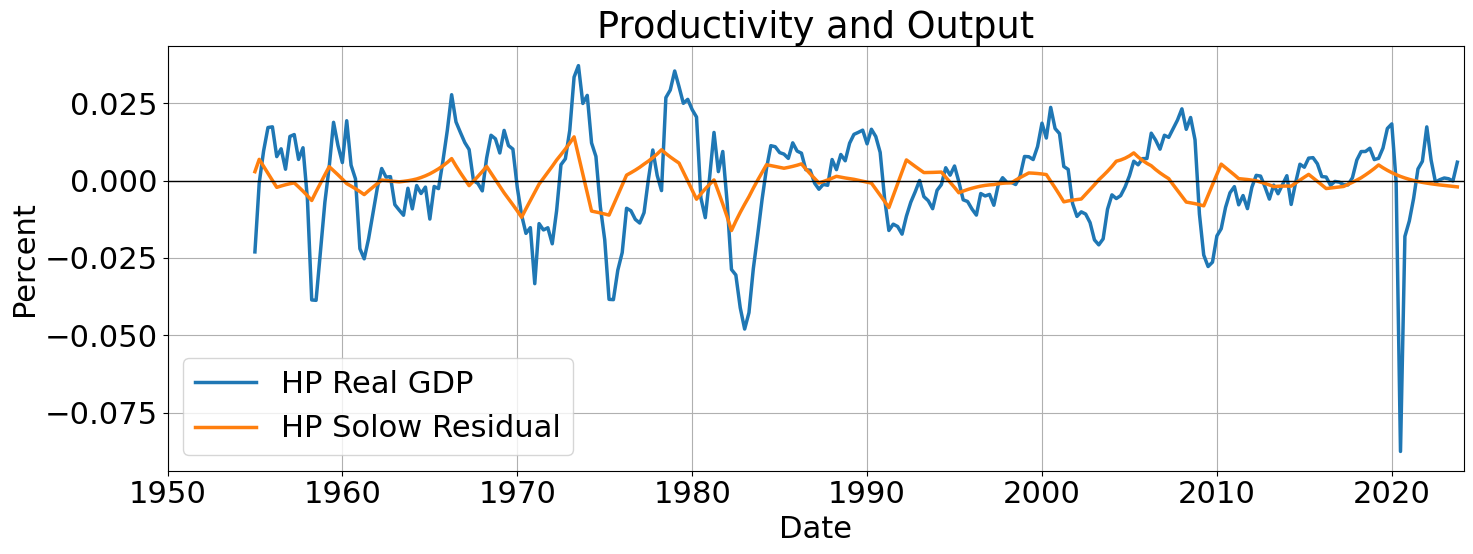

In [32]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(15, 6))

# Define the x-axis range from 1970 to present and major ticks from 1980
x_range = [pd.to_datetime('1950-01-01'), pd.to_datetime('now')]
start_year = 1950
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Define the x-axis range
x_range = [pd.to_datetime('1950-01-01'), pd.to_datetime('now')]
start_year = 1950
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Plotting Productivity (Solow Residual) and Output
ax.plot(cleaned_solow.index, cycle_y_solow, label='HP Real GDP')
ax.plot(cleaned_solow.index, cycle_solow, label='HP Solow Residual')
ax.legend()
ax.grid(True)
ax.set_ylabel('Percent')
ax.set_xlabel('Date')
ax.set_title('Productivity and Output')
ax.set_xlim(x_range)  # Set the x-axis (time) limits
ax.set_xticks(major_ticks)  # Set the major ticks
ax.xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0


# Adjusts the subplot to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L1_product_last.pdf', transparent=True)

# Show the plot
plt.show()

## Lecture 4

## Further evidence: prime-aged men have lower extensive elasticity in data, yet...

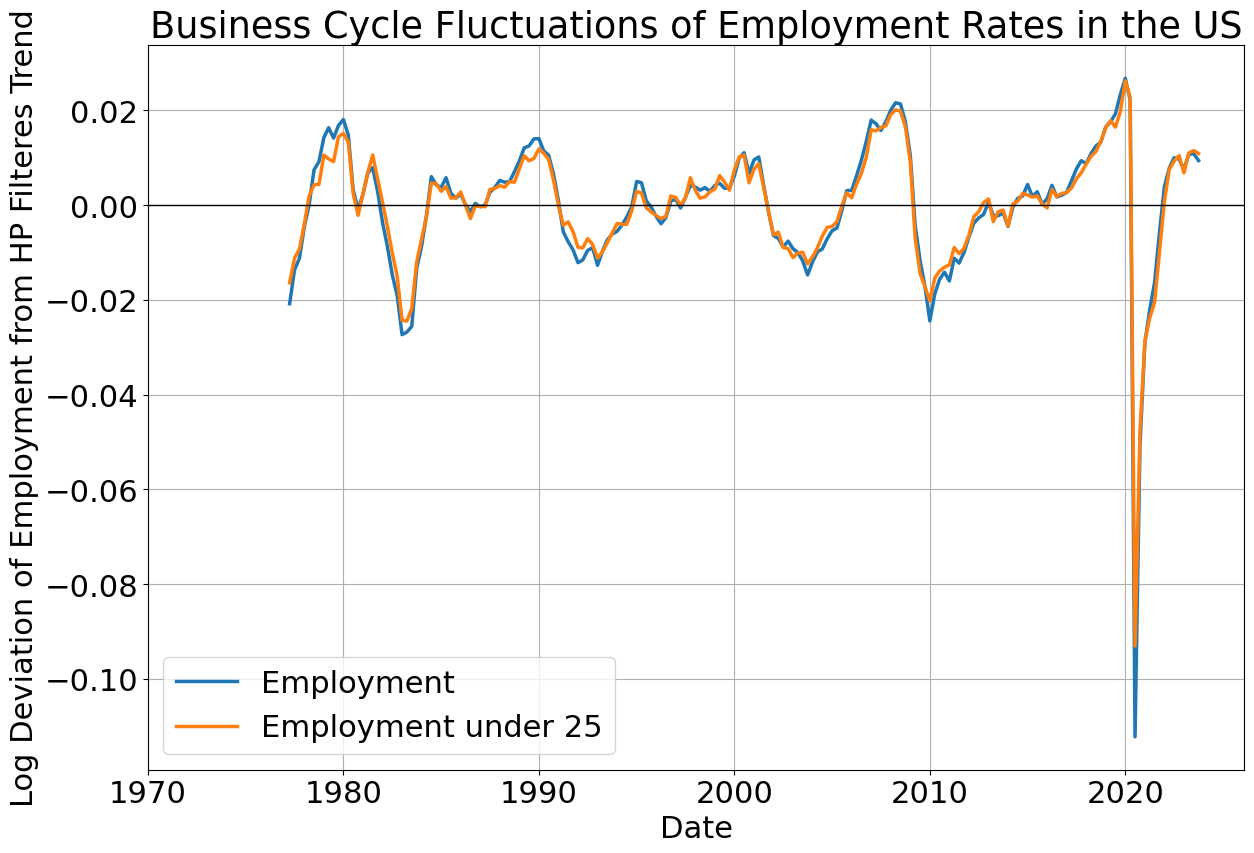

In [33]:
# Drop all NaN values from 'employment' and 'employmentm25'
cleaned_employment = series['employment'].dropna()
cleaned_employmentm25 = series['employmentm25'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_employment, trend_employment = sm.tsa.filters.hpfilter(np.log(cleaned_employment), lambdahp_1600)
cycle_employmentm25, trend_employmentm25 = sm.tsa.filters.hpfilter(np.log(cleaned_employmentm25), lambdahp_1600)

fig, ax = plt.subplots(figsize=(13, 9))

# Define the x-axis range
x_range = [pd.to_datetime('1970-01-01'), pd.to_datetime('now')]
start_year = 1970
end_year = pd.to_datetime('now').year
major_ticks = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-01-01', freq='10YS')
year_formatter = mdates.DateFormatter('%Y')

# Plotting employment and employmentm25
ax.plot(cleaned_employment.index, cycle_employment, label='Employment')
ax.plot(cleaned_employmentm25.index, cycle_employmentm25, label='Employment under 25')
ax.legend()
ax.grid(True)
ax.set_ylabel('Log Deviation of Employment from HP Filteres Trend')
ax.set_xlabel('Date')
ax.set_title('Business Cycle Fluctuations of Employment Rates in the US')
# ax.set_xlim(x_range)  # Set the x-axis (time) limits
ax.set_xticks(major_ticks)  # Set the major ticks
ax.xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0

# Adjusts the subplot to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L4_emprates.pdf', transparent=True)

# Show the plot
plt.show()

## What about real wages?

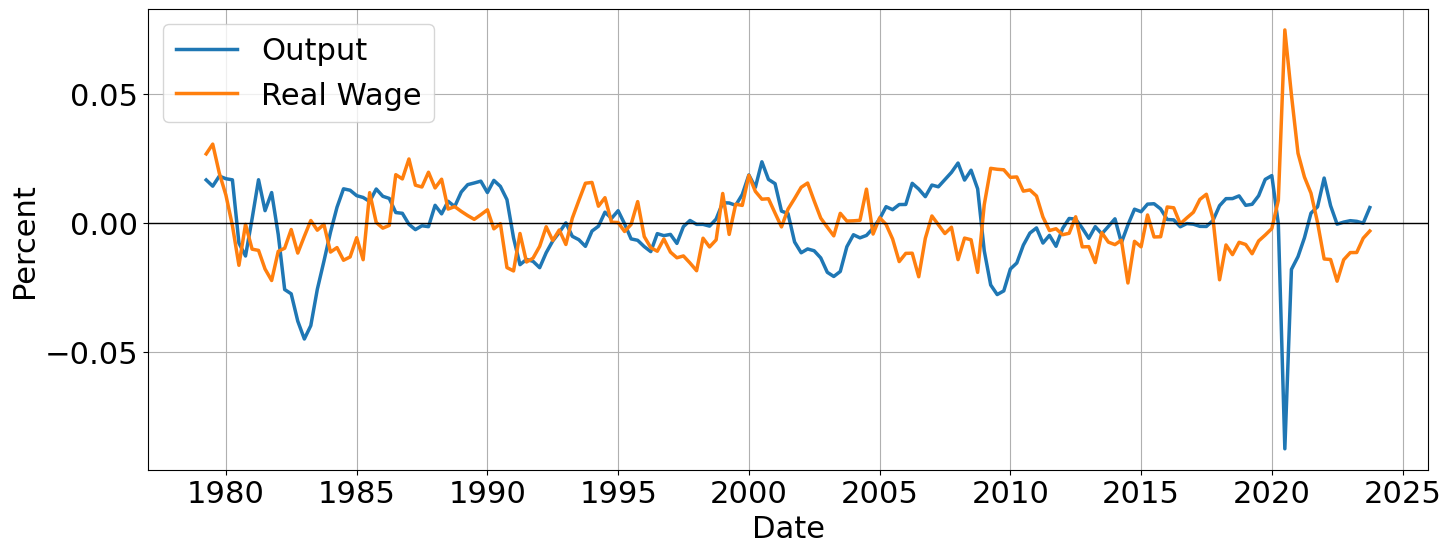

In [34]:
# Drop all NaN values from 'mrwage' (Real Wage) and 'y' (GDP)
cleaned_mrwage = series['mrwage'].dropna()
cleaned_y = series['y'].dropna()

# Step 2: Apply the HP Filter
# Apply the HP filter to the cleaned series
cycle_mrwage, trend_mrwage = sm.tsa.filters.hpfilter(np.log(cleaned_mrwage), lambdahp_1600)

# Apply the HP filter to 'y' for the corresponding cleaned series and align indices
cycle_y_mrwage, trend_y_mrwage = sm.tsa.filters.hpfilter(np.log(cleaned_y.reindex(cleaned_mrwage.index)), lambdahp_1600)

# Step 3: Plot the Data
# Create a single subplot
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting Real Wage and Output
ax.plot(cleaned_mrwage.index, cycle_y_mrwage, label='Output')
ax.plot(cleaned_mrwage.index, cycle_mrwage, label='Real Wage')
ax.legend()
ax.grid(True)
ax.set_ylabel('Percent')
# ax.set_xlim(x_range)  # Set the x-axis (time) limits
# ax.set_xticks(major_ticks)  # Set the major ticks
ax.xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0
ax.set_xlabel('Date')

# Adjust the subplot to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L4_rwage.pdf', transparent=True)
    

# Show the plot
plt.show()

## Criticizing the Solow Residual

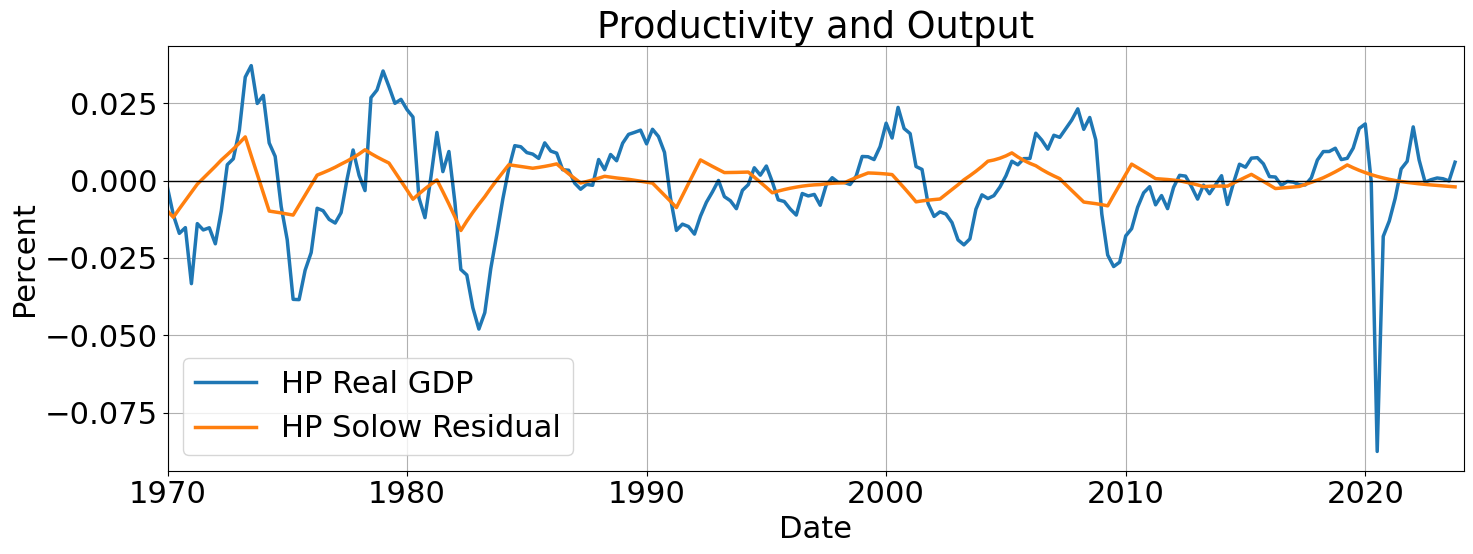

In [35]:
# Create a single subplot
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting Productivity (Solow Residual) and Output
ax.plot(cleaned_solow.index, cycle_y_solow, label='HP Real GDP')
ax.plot(cleaned_solow.index, cycle_solow, label='HP Solow Residual')
ax.legend()
ax.grid(True)
ax.set_ylabel('Percent')
ax.set_title('Productivity and Output')
ax.set_xlim(x_range)  # Set the x-axis (time) limits
ax.set_xticks(major_ticks)  # Set the major ticks
ax.xaxis.set_major_formatter(year_formatter)  # Format the x-axis labels to show only the year
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)  # Add black line at y=0
ax.set_xlabel('Date')

# Adjusts the subplot to fit into the figure area.
plt.tight_layout()

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L4_solow.pdf', transparent=True)

# Show the plot
plt.show()

## Lecture 5

## Money growth vs inflation in the US

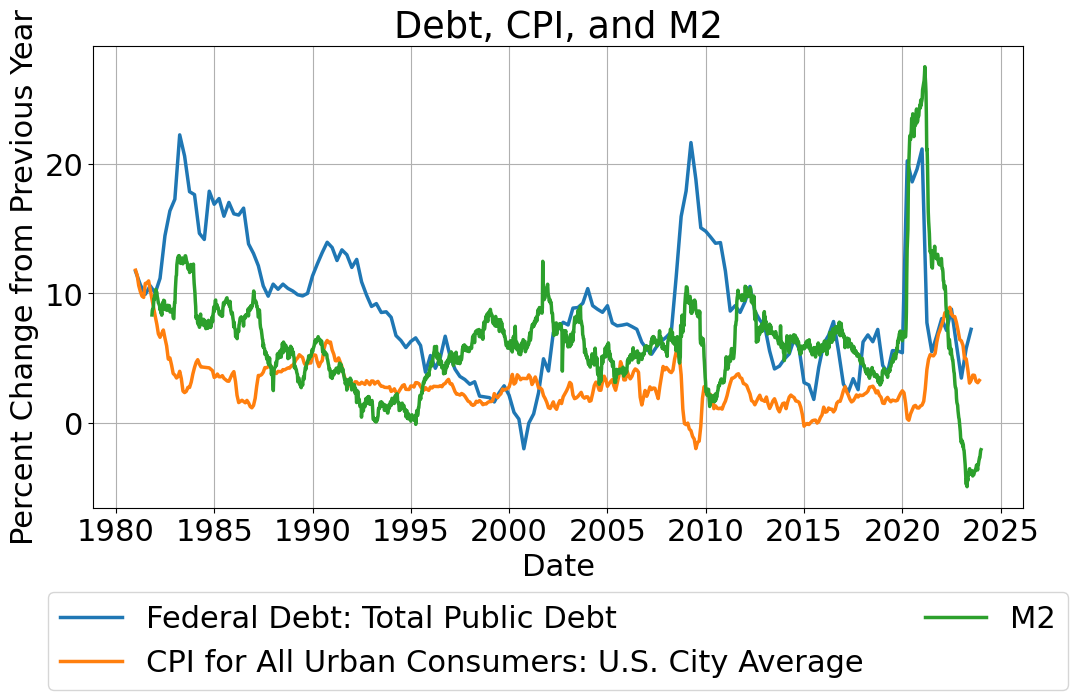

In [36]:
debt=FredReader('GFDEBTN', start='1980').read() # quarterly
cpi=FredReader('CPIAUCSL', start='1980').read() # monthly
mtwo=FredReader('WM2NS', start='1980').read() # weekly

# Resampling to Quarterly Data
cpi2 = cpi.pct_change(periods=12) * 100  # Resample monthly data to quarterly, taking the mean
mtwo2 = mtwo.pct_change(periods=52) * 100  # Resample weekly data to quarterly, taking the mean
debt2 = debt.pct_change(periods=4) * 100  


# Plotting the Data
plt.figure(figsize=(12, 6))
plt.plot(debt2.index, debt2, label='Federal Debt: Total Public Debt')
plt.plot(cpi2.index, cpi2, label='CPI for All Urban Consumers: U.S. City Average')
plt.plot(mtwo2.index, mtwo2, label='M2')

plt.xlabel('Date')
plt.ylabel('Percent Change from Previous Year')
plt.title('Debt, CPI, and M2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(True)

# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L5_debtcpim2.pdf', transparent=True)

plt.show()

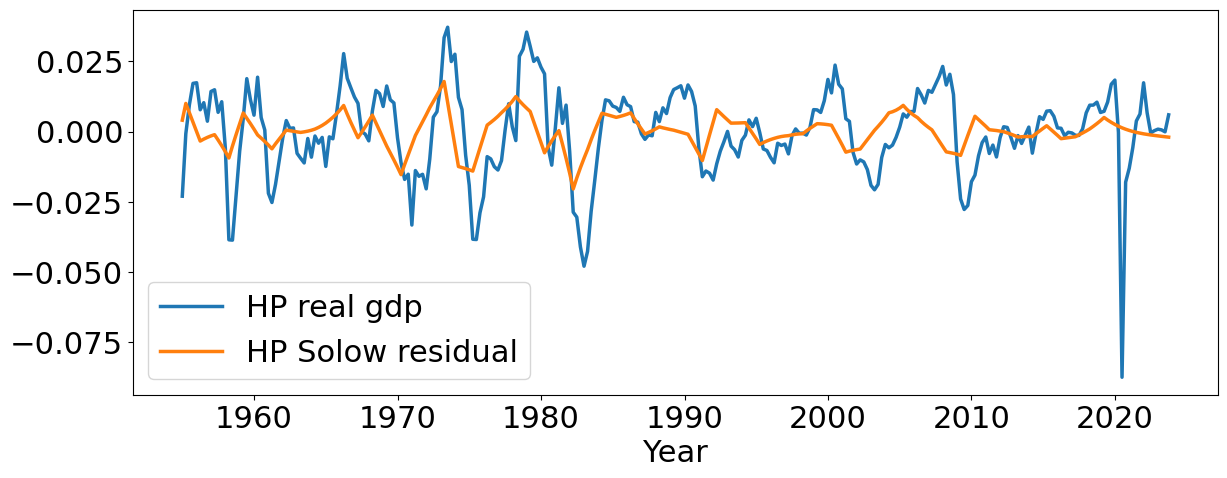

In [37]:
cycle_real_gdp, trend_real_gdp = sm.tsa.filters.hpfilter(np.log(series['y']), 1600)
cycle_solow_residual, trend_solow_residual = sm.tsa.filters.hpfilter(np.log(series['solow']), 1600)

# Plot the cyclical components
plt.figure(figsize=(14, 5))  # Adjust the size to your preference
plt.plot(cycle_real_gdp, label='HP real gdp')
plt.plot(cycle_solow_residual, label='HP Solow residual')
plt.legend(loc='best')
plt.xlabel('Year')


# Save the figure if save_fig is True
if save_fig:
    plt.savefig(f'{save_path}/L5_debtcpim2.pdf', transparent=True)

plt.show()

## L1 Measuring Technology Shocks (Last Fig)

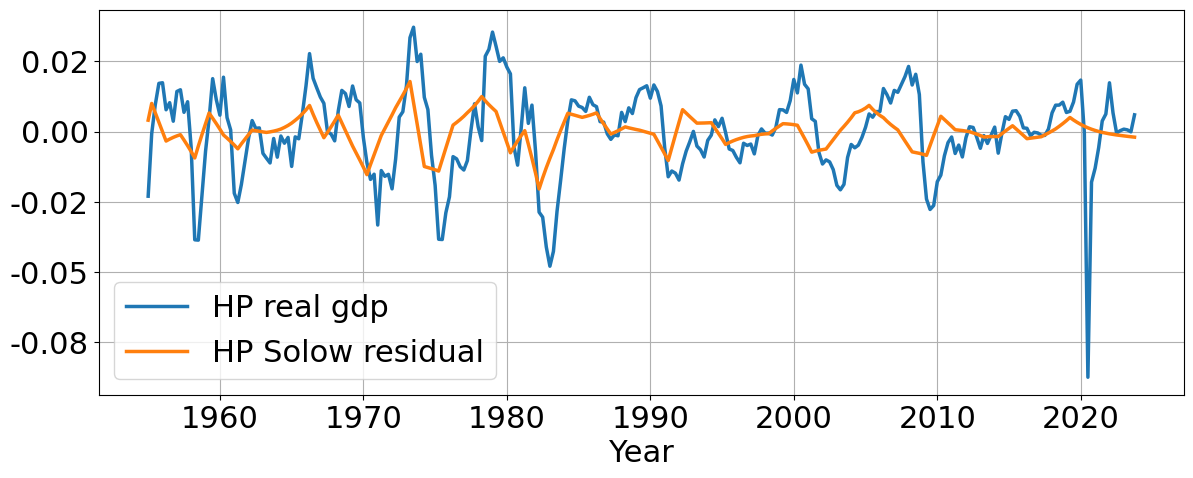

In [38]:
cycle_real_gdp, trend_real_gdp = sm.tsa.filters.hpfilter(np.log(series['y']), 1600)
cycle_solow_residual, trend_solow_residual = sm.tsa.filters.hpfilter(np.log(series['solow']), 1600)

# Plot the cyclical components
plt.figure(figsize=(14, 5))  # Adjust the size to your preference and make the background transparent
plt.plot(cycle_real_gdp, label='HP real gdp')
plt.plot(cycle_solow_residual, label='HP Solow residual')

# Add grid to the plot
plt.grid(True)

# Set the y-axis label format to two decimals
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(loc='best')
plt.xlabel('Year')

if save_fig:
    plt.savefig(f'{save_path}/L1_last_solow.pdf', bbox_inches='tight', transparent=True)

plt.show()
